# Нейронная сеть tensorflow

# Итоговое задание №2. Прогнозирование конечных свойств новых материалов (композиционных материалов)
На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов. 

Предсказание (из семинара 22): 
* модуль упругости при растяжении
* прочности при растяжении
* cоотношение матрица-наполнитель

Предсказание (из итогового вебинара 26.11.2022):
* модуль упругости при растяжении
* прочности при растяжении

In [126]:
import numpy as np
import pandas as pd

In [127]:
# считывание данных из файла
def load_simple_df(full_nm_str):
    sdf = pd.read_csv('../data/interim/'+full_nm_str+'.csv', sep=';',index_col=0) # Загрузка и создание датафрейма из csv файла
    return sdf

#считывание всех наборов для одного из целевых показателей
def load_data(nm_str):
    x_train = load_simple_df('X_train_'+nm_str)
    y_train = load_simple_df('y_train_'+nm_str)
    x_test = load_simple_df('X_test_'+nm_str)
    y_test=load_simple_df('y_test_'+nm_str)
    x_val=load_simple_df('X_val_'+nm_str)
    y_val=load_simple_df('y_val_'+nm_str)
    return (x_train, y_train, x_test, y_test, x_val, y_val)

Нейронная сеть

In [128]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

In [194]:
# тренировка модели 
def try_tensor_elastic(x_train, y_train, x_val, y_val):
    #normalizer = tf.keras.layers.Normalization(axis=-1)
    #normalizer.adapt(np.array(x_train))

    #tensor_model = tf.keras.Sequential([normalizer, tf.keras.layers.Dense(units=1)])
    tensor_model = tf.keras.Sequential()
    tensor_model.add(Dense(128, input_dim = 10, activation = 'relu'))
    tensor_model.add(Dense(128, activation = 'relu'))
    tensor_model.add(Dense(128, activation = 'relu'))
    tensor_model.add(Dense(128, activation = 'relu'))
    tensor_model.add(Dropout(0.2))
    tensor_model.add(Dense(128, activation = 'relu'))
    tensor_model.add(Dense(128, activation = 'relu'))
    tensor_model.add(Dropout(0.2))
    tensor_model.add(Dense(128, activation = 'relu'))
    tensor_model.add(Dense(64, activation = 'relu'))
    tensor_model.add(Dropout(0.2))
    tensor_model.add(Dense(32, activation = 'relu'))
    tensor_model.add(Dropout(0.2))
    tensor_model.add(Dense(16, activation = 'relu'))
    tensor_model.add(Dropout(0.2))
    tensor_model.add(Dense(1, activation = 'relu'))

    tensor_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                        loss='mean_squared_error')

    tensor_model.summary()
    model_hist = tensor_model.fit(x_train, y_train, epochs=70, verbose=1,
                                    validation_split = 0.2)  
    model_hist.history                                                 
    
    MSE = mean_squared_error(y_val, tensor_model.predict(x_val.values))
    R2 = r2_score(y_val, tensor_model.predict(x_val.values))

    return (MSE, R2, tensor_model, model_hist)


# тренировка модели 
def try_tensor_strength(x_train, y_train, x_val, y_val):
    tensor_model = tf.keras.Sequential()
    tensor_model.add(Dense(128, input_dim = 10, activation = 'relu'))
    tensor_model.add(Dense(128, activation = 'relu'))
    tensor_model.add(Dense(128, activation = 'relu'))
    tensor_model.add(Dense(64, activation = 'relu'))
    tensor_model.add(Dropout(0.2))
    tensor_model.add(Dense(32, activation = 'relu'))
    tensor_model.add(Dropout(0.2))
    tensor_model.add(Dense(16, activation = 'relu'))
    tensor_model.add(Dropout(0.2))
    tensor_model.add(Dense(1, activation = 'relu'))

    tensor_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                        loss='mean_squared_error')

    tensor_model.summary()
    model_hist = tensor_model.fit(x_train, y_train, epochs=70, verbose=1,
                                    validation_split = 0.2)  
    model_hist.history                                                 
    
    MSE = mean_squared_error(y_val, tensor_model.predict(x_val.values))
    R2 = r2_score(y_val, tensor_model.predict(x_val.values))

    return (MSE, R2, tensor_model, model_hist)

    # тренировка модели 
def try_tensor_matrix(x_train, y_train, x_val, y_val):
    tensor_model = tf.keras.Sequential()
    tensor_model.add(Dense(10, input_dim = 10, activation = 'relu'))
    tensor_model.add(Dense(20, activation = 'relu'))
    tensor_model.add(Dense(40, activation = 'relu'))
    tensor_model.add(Dense(64, activation = 'relu'))
    tensor_model.add(Dropout(0.2))
    tensor_model.add(Dense(32, activation = 'relu'))
    tensor_model.add(Dropout(0.2))
    tensor_model.add(Dense(16, activation = 'relu'))
    tensor_model.add(Dropout(0.2))
    tensor_model.add(Dense(1, activation = 'relu'))

    tensor_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                        loss='mean_squared_error')

    tensor_model.summary()
    model_hist = tensor_model.fit(x_train, y_train, epochs=70, verbose=1,
                                    validation_split = 0.2)  
    model_hist.history                                                 
    
    MSE = mean_squared_error(y_val, tensor_model.predict(x_val.values))
    R2 = r2_score(y_val, tensor_model.predict(x_val.values))

    return (MSE, R2, tensor_model, model_hist)

In [173]:
#запуск модели и вычисление метрик
def fit_tensor(nm_file_str, nm_error_df_str):
    #считываем данные из файлов
    x_train_df = pd.DataFrame()
    y_train_df = pd.DataFrame()
    x_test_df = pd.DataFrame()
    y_test_df = pd.DataFrame()
    x_val_df = pd.DataFrame()
    y_val_df = pd.DataFrame()

    (x_train_df, y_train_df, x_test_df, y_test_df, x_val_df, y_val_df) = load_data(nm_file_str)

    #обучаем модель
    if nm_file_str=='elastic':
        (MSE, R2, prediction_y_tensor, hist_y_tensor) = try_tensor_elastic(x_train_df, y_train_df, x_val_df, y_val_df)
    elif nm_file_str=='strength':
        (MSE, R2, prediction_y_tensor, hist_y_tensor) = try_tensor_strength(x_train_df, y_train_df, x_val_df, y_val_df)
    elif nm_file_str=='matrix':
        (MSE, R2, prediction_y_tensor, hist_y_tensor) = try_tensor_matrix(x_train_df, y_train_df, x_val_df, y_val_df)       
        print(nm_file_str)     
    tensor_errors = pd.DataFrame({'model_name':'Tensor',
                              'target_var':[nm_error_df_str],
                              'MSE':[MSE],
                              'R2':[R2]})
    return (tensor_errors, x_val_df, y_val_df, prediction_y_tensor, hist_y_tensor)

In [135]:
#визуализация
import matplotlib.pyplot as plt

def model_loss_plot(model_hist, nm_param):
    plt.figure(figsize=(17,5))
    plt.plot(model_hist.history['loss'])
    plt.plot(model_hist.history['val_loss'])
    plt.title(f'График потерь {nm_param}')
    plt.ylabel('MSE')
    plt.xlabel('Эпоха')
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

In [112]:
#визуализация
import matplotlib.pyplot as plt

def actual_and_predicted_plot(orig, predict, var, model_name):
    plt.figure(figsize=(17,5))
    plt.title(f'Валидационные и прогнозные значения: {model_name}')
    plt.plot(orig, label='Валидация')
    plt.plot(predict, label='Прогноз')
    plt.legend(loc='best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()

Для каждой характеристики запускаем последовательно обучение моделей

In [195]:
#датасет со значениями ошибок
errors_df = pd.DataFrame(columns=['target_var','model_name','MSE','R2'])

(fit_errors, x_val_elastic, y_val_elastic, y_elastic_predict, y_elastic_hist) = fit_tensor('elastic', 'Модуль упругости при растяжении, ГПа')
errors_df = pd.concat([errors_df, fit_errors], ignore_index=True)
(fit_errors, x_val_strength, y_val_strength, y_strength_predict, y_strength_hist) = fit_tensor('strength', 'Прочность при растяжении, МПа')
errors_df = pd.concat([errors_df, fit_errors], ignore_index=True)
(fit_errors, x_val_matrix, y_val_matrix, y_matrix_predict, y_matrix_hist) = fit_tensor('matrix', 'Соотношение матрица-наполнитель')
errors_df = pd.concat([errors_df, fit_errors], ignore_index=True)
errors_df

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense_469 (Dense)           (None, 2)                 22        
                                                                 
 dense_470 (Dense)           (None, 128)               384       
                                                                 
 dense_471 (Dense)           (None, 128)               16512     
                                                                 
 dense_472 (Dense)           (None, 128)               16512     
                                                                 
 dense_473 (Dense)           (None, 128)               16512     
                                                     

,target_var,model_name,MSE,R2
0,"Модуль упругости при растяжении, ГПа",Tensor,117.422934,-11.565989
1,"Прочность при растяжении, МПа",Tensor,223764.738046,-0.026855
2,Соотношение матрица-наполнитель,Tensor,9.617604,-11.159167


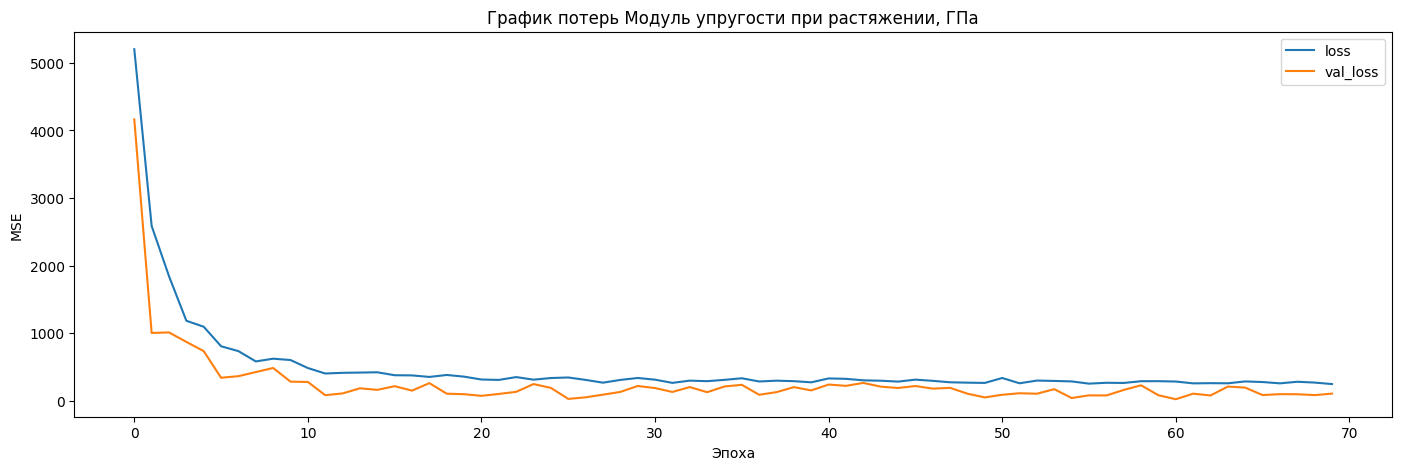

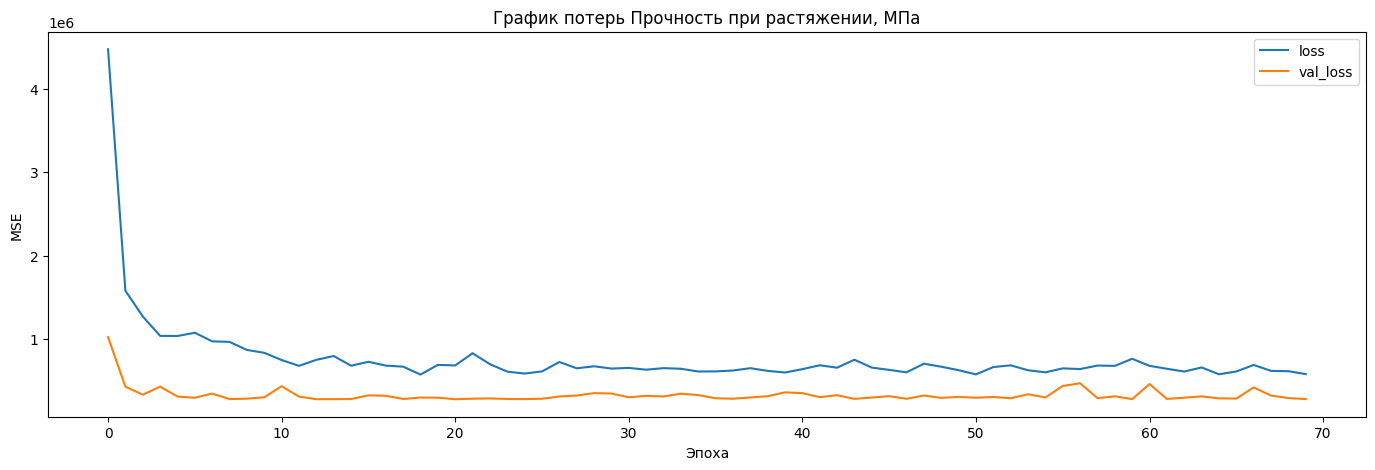

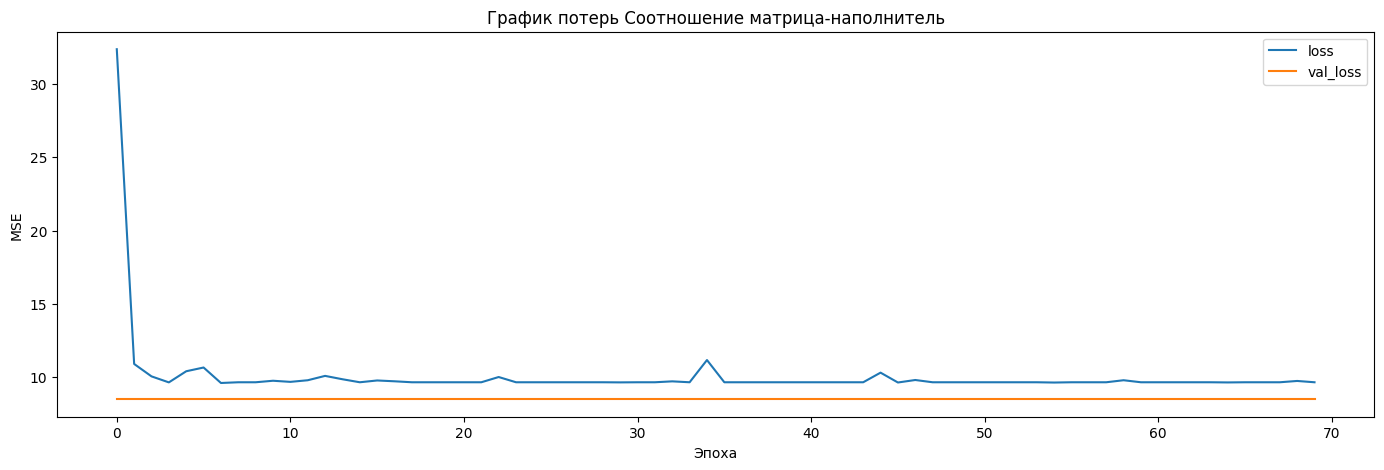

In [196]:
model_loss_plot(y_elastic_hist, 'Модуль упругости при растяжении, ГПа')
model_loss_plot(y_strength_hist, 'Прочность при растяжении, МПа')
model_loss_plot(y_matrix_hist, 'Соотношение матрица-наполнитель')

7/7 [==============================] - 0s 3ms/step


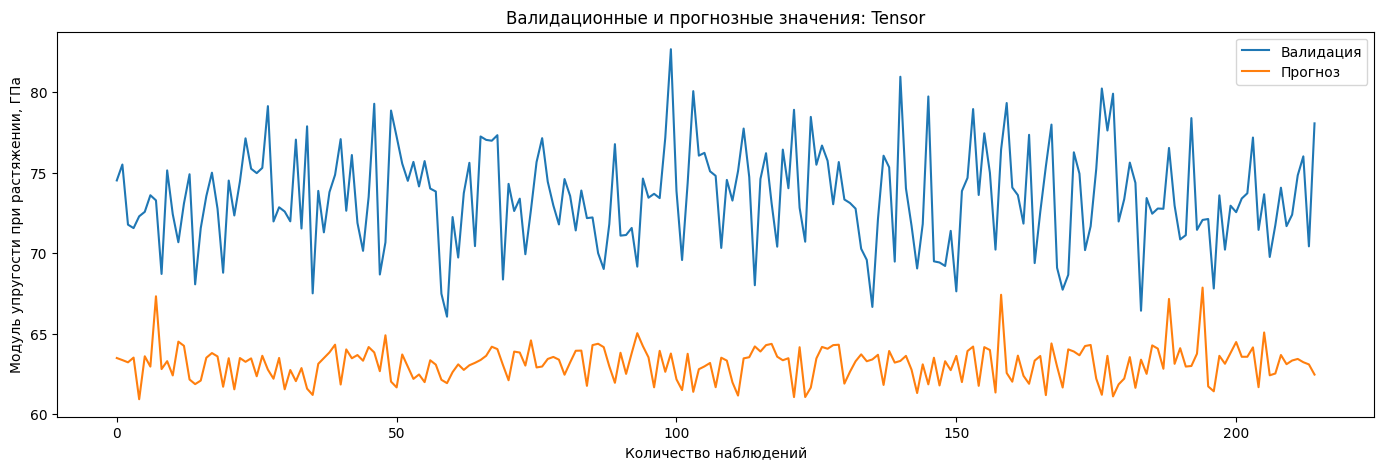

7/7 [==============================] - 0s 2ms/step


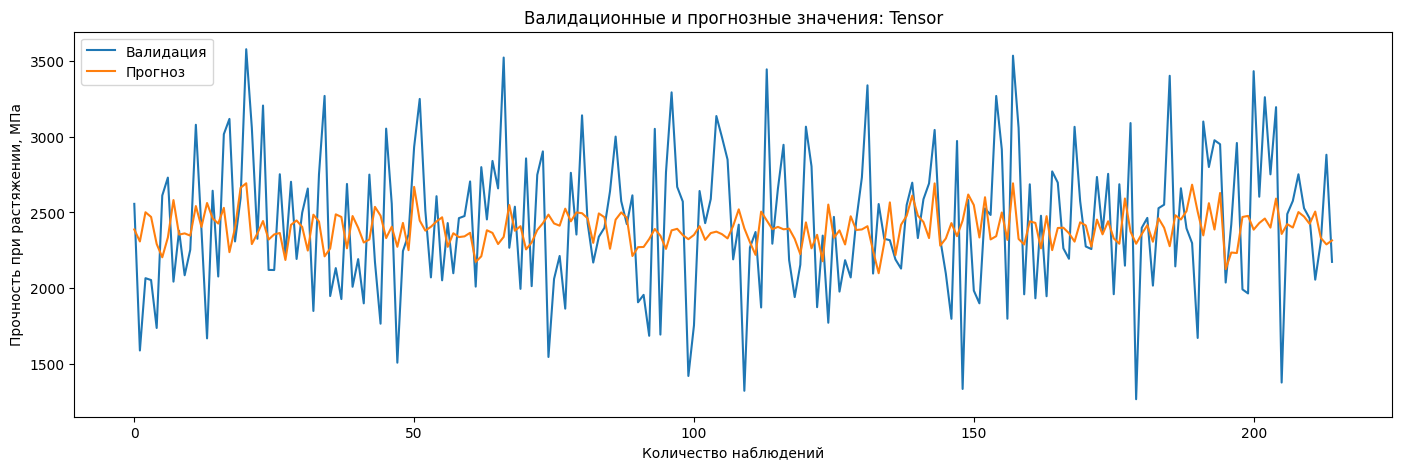

7/7 [==============================] - 0s 2ms/step


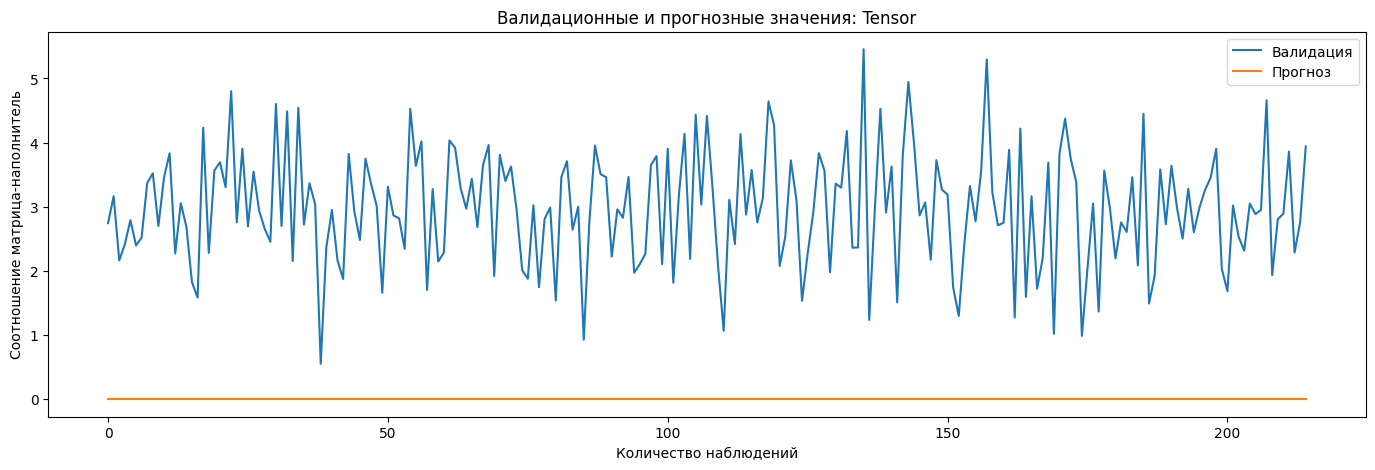

In [197]:
actual_and_predicted_plot(y_val_elastic.values,
                            y_elastic_predict.predict(x_val_elastic), 
                            'Модуль упругости при растяжении, ГПа',
                            'Tensor')
actual_and_predicted_plot(y_val_strength.values,
                            y_strength_predict.predict(x_val_strength), 
                            'Прочность при растяжении, МПа', 
                            'Tensor')
actual_and_predicted_plot(y_val_matrix.values,
                            y_matrix_predict.predict(x_val_matrix), 
                            'Соотношение матрица-наполнитель', 
                            'Tensor')

Взаимосвязи нейронной моделью не выявлены.
Возможные направления дальнейших исследований:
1. настройка модели либо
2. рассмотрение гипотезы, что модели ведут себя по-разному для разных классов композитов, поэтому вначале выполнить задачу кластеризации, затем рассмотреть разные кластеры алгоритмами ML, либо 
3. рассмотреть гипотезу, что взаимосвязи между собранными значениями отсутствуют и искать новые комбинации характеристик композитов